# Prueba de Banistmo - Probabilidad de Pago

Paso 1: Se instalan las librerias que sean necesarias.

In [ ]:
#pip install pandas

In [ ]:
#pip install fastapi

In [ ]:
#!pip install pycaret

In [ ]:
#pip install numpy

In [ ]:
#pip install uvicorn

In [ ]:
#pip install lightgbm 

In [ ]:
#pip install autoviz

In [ ]:
#pip install setuptools numpy scipy scikit-learn -U

In [ ]:
#pip install --use-deprecated=legacy-resolver pycaret[full]

Fue Necesario ejecutar en la consola el homebrew:
#/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

Se importan las liberias necesarias:

In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import pycaret as pycaret

In [4]:
import lightgbm as lgb

##Para acceder al dataset:

In [5]:
dataset = pd.read_csv("./default_dataset.csv")

Para visualizar la data y los campos incluidos en el dataset ejecutamos:

In [6]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,8920,50000,1,1,2,23,2,3,2,0,...,8687,9048,9306,0,1000,810,500,408,500,1
1,8926,20000,1,3,1,51,0,0,0,0,...,18905,19462,18967,1266,1270,2800,1000,0,512,1
2,8930,10000,1,2,2,29,2,2,2,2,...,9089,8658,8372,2600,600,895,0,0,764,1
3,8933,240000,2,2,2,42,1,2,2,0,...,166813,170739,174532,6700,0,6900,6000,6000,6000,1
4,8938,170000,2,1,2,30,2,0,0,0,...,30183,31041,31871,2000,2000,1233,1500,1500,2000,1


Para conocer la cantidad de datos que incluye el dataset en columnas y filas.

In [7]:
dataset.shape

(27999, 25)

Fracciono la data y la muestra que compararé

In [8]:
data = dataset.sample(frac=0.95, random_state=766)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print("Data para Modelar: " + str(data.shape))
print("Data de Control para Predición: " + str(data_unseen.shape))

Data para Modelar: (26599, 25)
Data de Control para Predición: (1400, 25)


Importo la función que contiene los modelos de clasificación con lo que evaluaré la data:

In [9]:
from pycaret.classification import *

Configuración de los paramentos para la evaluación de la data

Para el ejercicio configuro 3 variables con diferentes paramentros para ver cual haria que el modelo sea mas efectivo.

-Me decidí por la variable banp1, debido a de las 3 configuraciones que probé, esa fue la que mejor desempeño mostró a la hora de evaluar la muestra en el modelo.

In [11]:
banp1 = setup(data=data,target='default',session_id=123,fix_imbalance=True,ignore_low_variance = True)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26599, 25)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
banp2 = setup(data = data, target = 'default', session_id=123,
              normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True,
              pca=False,
              fix_imbalance = True ,
              group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [8]:
banp3 = setup(data = data, target = 'default', session_id=123,
              normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
              pca=False,
              fix_imbalance = True )

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26599, 25)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Comparo todos los modelos y selecciono el Top 3.

In [12]:
compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8661,0.8431,0.3856,0.6633,0.4874,0.4166,0.4370,16.006
ada,Ada Boost Classifier,0.8647,0.8326,0.3966,0.6487,0.4918,0.4191,0.4362,3.671
lightgbm,Light Gradient Boosting Machine,0.8646,0.8434,0.3775,0.6576,0.4793,0.4081,0.4290,1.359
catboost,CatBoost Classifier,0.8633,0.8392,0.3781,0.6482,0.4770,0.4048,0.4245,30.708
xgboost,Extreme Gradient Boosting,0.8608,0.8322,0.3797,0.6314,0.4738,0.3994,0.4168,15.428
rf,Random Forest Classifier,0.8601,0.8202,0.3648,0.6329,0.4624,0.3888,0.4085,5.558
et,Extra Trees Classifier,0.8537,0.7890,0.3479,0.5996,0.4401,0.3628,0.3807,4.617
dummy,Dummy Classifier,0.8345,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.252
dt,Decision Tree Classifier,0.7904,0.6475,0.4339,0.3826,0.4065,0.2798,0.2807,0.783
lda,Linear Discriminant Analysis,0.7798,0.7916,0.6047,0.3925,0.4759,0.3444,0.3574,0.773


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=123),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
   

En este caso, considero que lightgbm me es mas funcional debido a que su accuracy y su precisión son altas y su tiempo de ejecución es mucho mas bajo comparado a los otros 2 modelos.

#Creo mi modelo al cual le pongo de nombre Mocca:

In [13]:
mocca = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8722,0.8463,0.4318,0.6786,0.5278,0.4581,0.4737
1,0.8641,0.8363,0.3864,0.6503,0.4847,0.4123,0.4308
2,0.8588,0.8415,0.3344,0.6398,0.4392,0.3674,0.3928
3,0.8738,0.8666,0.4188,0.6973,0.5233,0.4558,0.4755
4,0.8571,0.8372,0.3506,0.6207,0.4481,0.3733,0.3934
5,0.8754,0.8645,0.4123,0.7135,0.5226,0.4568,0.4796
6,0.8668,0.8391,0.3734,0.6765,0.4812,0.4120,0.4360
7,0.8561,0.8434,0.3474,0.6149,0.4440,0.3686,0.3884
8,0.8663,0.8372,0.3883,0.6667,0.4908,0.4199,0.4403


Muestro los parametros actuales del modelo que elegí

In [14]:
print(mocca)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Evaluo el modelo 

In [15]:
evaluate_model(mocca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Se tunea el modelo

In [16]:
tuned_mocca = tune_model(mocca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8706,0.8538,0.4253,0.6718,0.5209,0.4504,0.4661
1,0.8652,0.8349,0.3929,0.6541,0.4909,0.4187,0.4368
2,0.8582,0.8414,0.3442,0.6310,0.4454,0.3721,0.3946
3,0.8711,0.8696,0.4058,0.6868,0.5102,0.4416,0.4619
4,0.8652,0.8365,0.3864,0.6575,0.4867,0.4151,0.4345
5,0.8738,0.8636,0.4123,0.7017,0.5194,0.4524,0.4736
6,0.8716,0.8382,0.4026,0.6927,0.5092,0.4413,0.4629
7,0.8604,0.8515,0.3377,0.6500,0.4444,0.3736,0.3999
8,0.8695,0.8389,0.4078,0.6774,0.5091,0.4391,0.4580


Se muestran los nuevos parametros asignados al modelo tuneado:

In [17]:
print(tuned_mocca)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


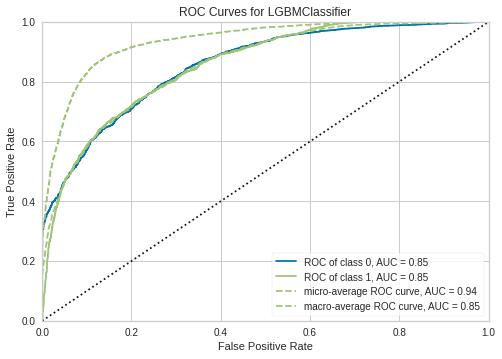

In [18]:
plot_model(mocca, plot='auc')

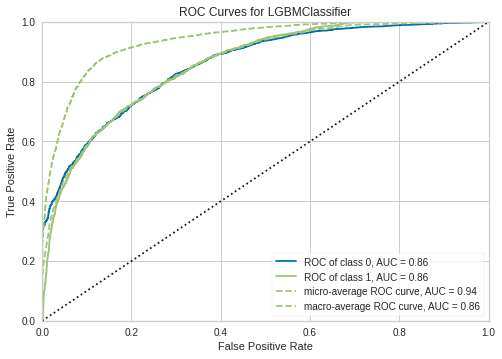

In [19]:
plot_model(tuned_mocca,plot='auc')

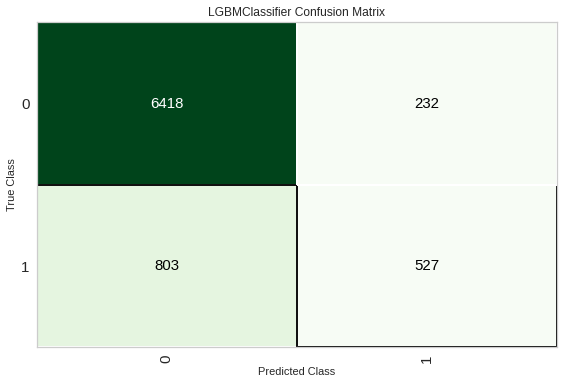

In [20]:
plot_model(tuned_mocca,plot='confusion_matrix')

In [21]:
predict_model(tuned_mocca)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8703,0.8573,0.3962,0.6943,0.5045,0.4363,0.459


,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,default,Label,Score
0,8302.0,110000.0,27.0,8086.0,8848.0,9283.0,8950.0,8943.0,333.0,1232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9983
1,2278.0,160000.0,53.0,2475.0,2475.0,5175.0,2475.0,3975.0,8175.0,2475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9986
2,2301.0,200000.0,44.0,188553.0,192100.0,126343.0,125700.0,126448.0,81008.0,8011.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9962
3,27487.0,30000.0,57.0,24911.0,26241.0,27512.0,27831.0,28795.0,29285.0,1750.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7586
4,23809.0,30000.0,54.0,0.0,0.0,0.0,0.0,20363.0,20819.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,5709.0,320000.0,35.0,227927.0,218565.0,223284.0,98028.0,102498.0,80469.0,10000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9973
7976,17497.0,80000.0,28.0,52062.0,49884.0,22348.0,22063.0,8723.0,7254.0,2158.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7021
7977,24060.0,240000.0,28.0,44996.0,-4.0,-4.0,-4.0,801.0,192850.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9188
7978,12535.0,210000.0,34.0,140272.0,115922.0,105875.0,97873.0,90872.0,72969.0,6018.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8948


Creo el dashboard explicativo del modelo y consigo la dirección html

In [22]:
dashboard(tuned_mocca)

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


 98%|===================| 7804/7980 [00:37<00:00]       

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

Guardo el Modelo creado.

In [23]:
save_model(tuned_mocca, 'predicted_mocca')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=96,
                                 min_child_weight=

Carga del Modelo

In [24]:
loaded_model = load_model('predicted_mocca')

Transformation Pipeline and Model Successfully Loaded


Muestro los parametros del Modelo creado.

In [25]:
print(loaded_model)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=96,
                                min_child_weight=0.001, min_split_